# Weapon Accuracy

## Setting Up

In [1]:
import pandas as pd
from scripts.probability import at_least_one

%run weapon_full_data.ipynb

# Accuracy Range

Soldiers start with an Accuracy value between 40 and 70. But the attribute may go up to 120. So we are going to prepare a set moving between 40 and 120.

As the average Accuracy for new soldiers is 55 we add this as one of the values.

In [2]:
data = []
for i in range(40, 121, 1):
    data.append(i)

accuracy_range = pd.DataFrame(data, columns = ["soldier_accuracy"])

## Merging With Weapons

In [3]:
weapon_attacks_proficiency = weapon_data.append([weapon_data] * (len(accuracy_range.index)-1), ignore_index=True)
weapon_attacks_proficiency["key"] = weapon_attacks_proficiency.groupby(["weapon", "ammo", "fire_mode"]).cumcount()

weapon_attacks_proficiency = pd.merge(weapon_attacks_proficiency, accuracy_range, left_on="key", right_index=True, how="left", sort=False)
weapon_attacks_proficiency = weapon_attacks_proficiency.drop(columns=["key"])

## Final Accuracy

For our needs the accuracy formula is just the weapon accuracy multiplied by the soldier accuracy.

In [4]:
weapon_attacks_proficiency["chance_to_hit"] = weapon_attacks_proficiency.apply(lambda x: x["accuracy"] * x["soldier_accuracy"] / 10000, axis=1)
weapon_attacks_proficiency

,weapon,grip,ammo,damage,damage_type,capacity,fire_mode,time_units,accuracy,average_chance_to_hit,burst,turn_max_shots,turns_to_reload,turn_damage_max,turn_damage_expected,clip_damage,damage_per_time_unit,soldier_accuracy,chance_to_hit
0,dart_gun,1,dart_gun_clip,16,armor_piercing,12.0,snapshot,20,40,0.2200,1,3,4.0,48,10.560,192.0,0.800000,40,0.16
1,dart_gun,1,dart_gun_clip,16,armor_piercing,12.0,aimed,50,80,0.4400,1,1,12.0,16,7.040,192.0,0.320000,40,0.32
2,jet_harpoon,2,jet_harpoon_clip,10,armor_piercing,32.0,auto,40,40,0.2200,3,2,16.0,20,4.400,320.0,0.250000,40,0.16
3,jet_harpoon,2,jet_harpoon_clip,10,armor_piercing,32.0,snapshot,35,60,0.3300,1,2,16.0,20,6.600,320.0,0.285714,40,0.24
4,jet_harpoon,2,jet_harpoon_clip,10,armor_piercing,32.0,aimed,70,90,0.4950,1,1,32.0,10,4.950,320.0,0.142857,40,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,gauss_cannon_turret,2,sws_gauss_shell,110,gauss,50.0,snapshot,33,50,0.2750,1,2,25.0,220,60.500,5500.0,3.333333,120,0.60
4856,gauss_cannon_turret,2,sws_gauss_shell,110,gauss,50.0,aimed,75,85,0.4675,1,1,50.0,110,51.425,5500.0,1.466667,120,1.02
4857,sonic_cannon_turret,2,sonic_cannon_turret_shell,110,sonic,100.0,snapshot,30,85,0.4675,1,2,50.0,220,102.850,11000.0,3.666667,120,1.02
4858,sonic_cannon_turret,2,sonic_cannon_turret_shell,110,sonic,100.0,aimed,60,100,0.5500,1,1,100.0,110,60.500,11000.0,1.833333,120,1.20


# Weapon Accuracies On Average

In [5]:
weapon_proficiency_development_average = weapon_attacks_proficiency[["weapon", "fire_mode", "soldier_accuracy", "chance_to_hit"]]
weapon_proficiency_development_average = weapon_proficiency_development_average.groupby(["weapon", "soldier_accuracy"]).mean()
weapon_proficiency_development_average = weapon_proficiency_development_average.sort_values(by=["weapon"])
weapon_proficiency_development_average

chance_to_hit
weapon                 soldier_accuracy               
aqua_jet_cannon_turret 40                       0.3400
                       98                       0.8330
                       97                       0.8245
                       96                       0.8160
                       95                       0.8075
...                                                ...
vibro_blade            63                       0.9450
                       62                       0.9300
                       61                       0.9150
                       58                       0.8700
                       120                      1.8000

[2106 rows x 1 columns]

## Kinetic Weapons

Text(0, 0.5, 'Final accuracy')

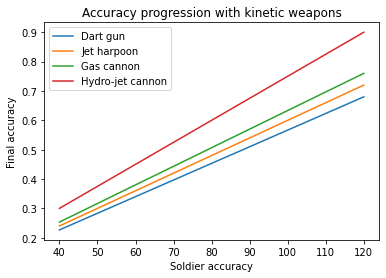

In [6]:
weapon_proficiency_development_average_kinetic = weapon_proficiency_development_average.loc[ ["dart_gun", "jet_harpoon", "gas_cannon", "hidro_jet_cannon"] ]
weapon_proficiency_development_average_kinetic = weapon_proficiency_development_average_kinetic.sort_values(by=["chance_to_hit"])
weapon_proficiency_development_average_kinetic = weapon_proficiency_development_average_kinetic.unstack(level=0)
ax = weapon_proficiency_development_average_kinetic.plot(title="Accuracy progression with kinetic weapons")
ax.legend(["Dart gun", "Jet harpoon", "Gas cannon", "Hydro-jet cannon"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("Final accuracy")

## Melee

Text(0, 0.5, 'Final accuracy')

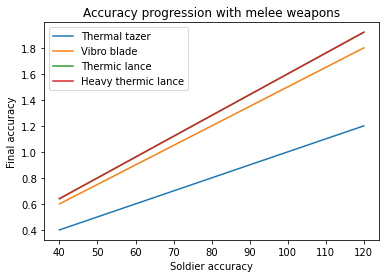

In [7]:
weapon_proficiency_development_average_melee = weapon_proficiency_development_average.loc[ ["thermal_tazer", "vibro_blade", "thermic_lance", "heavy_thermic_lance"] ]
weapon_proficiency_development_average_melee = weapon_proficiency_development_average_melee.sort_values(by=["chance_to_hit"])
weapon_proficiency_development_average_melee = weapon_proficiency_development_average_melee.unstack(level=0)
ax = weapon_proficiency_development_average_melee.plot(title="Accuracy progression with melee weapons")
ax.legend(["Thermal tazer", "Vibro blade", "Thermic lance", "Heavy thermic lance"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("Final accuracy")

## Explosive

Text(0, 0.5, 'Final accuracy')

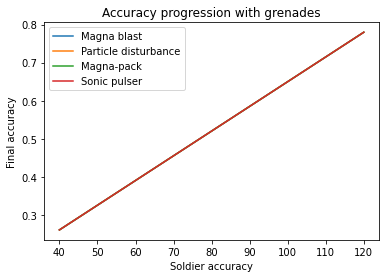

In [8]:
weapon_proficiency_development_average_grenade = weapon_proficiency_development_average.loc[ ["magna_blast_grenade", "particle_disturbance_grenade", "magna_pack_explosive", "sonic_pulser"] ]
weapon_proficiency_development_average_grenade = weapon_proficiency_development_average_grenade.sort_values(by=["chance_to_hit"])
weapon_proficiency_development_average_grenade = weapon_proficiency_development_average_grenade.unstack(level=0)
ax = weapon_proficiency_development_average_grenade.plot(title="Accuracy progression with grenades")
ax.legend(["Magna blast", "Particle disturbance", "Magna-pack", "Sonic pulser"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("Final accuracy")

Text(0, 0.5, 'Final accuracy')

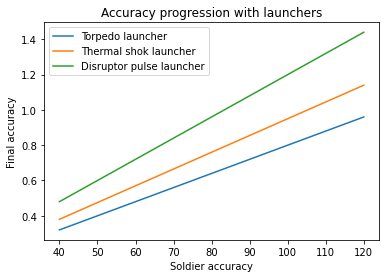

In [9]:
weapon_proficiency_development_average_launcher = weapon_proficiency_development_average.loc[ ["torpedo_launcher", "disruptor_pulse_launcher", "thermal_shok_launcher"] ]
weapon_proficiency_development_average_launcher = weapon_proficiency_development_average_launcher.sort_values(by=["chance_to_hit"])
weapon_proficiency_development_average_launcher = weapon_proficiency_development_average_launcher.unstack(level=0)
ax = weapon_proficiency_development_average_launcher.plot(title="Accuracy progression with launchers")
ax.legend(["Torpedo launcher", "Thermal shok launcher", "Disruptor pulse launcher"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("Final accuracy")

## Gauss

Text(0, 0.5, 'Final accuracy')

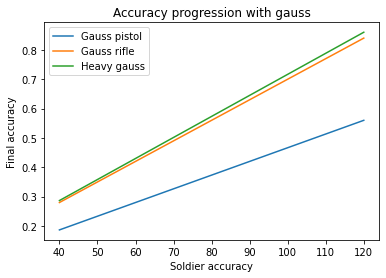

In [10]:
weapon_proficiency_development_average_laser = weapon_proficiency_development_average.loc[ ["gauss_pistol", "gauss_rifle", "heavy_gauss"] ]
weapon_proficiency_development_average_laser = weapon_proficiency_development_average_laser.sort_values(by=["chance_to_hit"])
weapon_proficiency_development_average_laser = weapon_proficiency_development_average_laser.unstack(level=0)
ax = weapon_proficiency_development_average_laser.plot(title="Accuracy progression with gauss")
ax.legend(["Gauss pistol", "Gauss rifle", "Heavy gauss"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("Final accuracy")

## Sonic

Text(0, 0.5, 'Final accuracy')

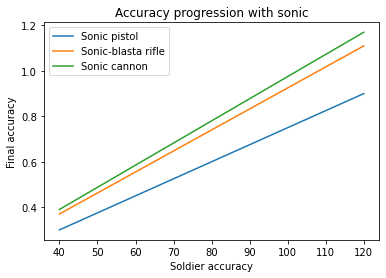

In [11]:
weapon_proficiency_development_average_plasma = weapon_proficiency_development_average.loc[ ["sonic_pistol", "sonic_blasta_rifle", "sonic_cannon"] ]
weapon_proficiency_development_average_plasma = weapon_proficiency_development_average_plasma.sort_values(by=["chance_to_hit"])
weapon_proficiency_development_average_plasma = weapon_proficiency_development_average_plasma.unstack(level=0)
ax = weapon_proficiency_development_average_plasma.plot(title="Accuracy progression with sonic")
ax.legend(["Sonic pistol", "Sonic-blasta rifle", "Sonic cannon"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("Final accuracy")

## Tank

Tanks don't increase skills. But the calculations are included.

Text(0, 0.5, 'Final accuracy')

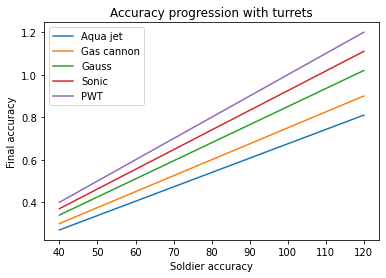

In [12]:
weapon_proficiency_development_average_turret = weapon_proficiency_development_average.loc[ ["aqua_jet_cannon_turret", "gas_cannon_turret", "gauss_cannon_turret", "sonic_cannon_turret", "pwt_cannon_turret"] ]
weapon_proficiency_development_average_turret = weapon_proficiency_development_average_turret.sort_values(by=["chance_to_hit"])
weapon_proficiency_development_average_turret = weapon_proficiency_development_average_turret.unstack(level=0)
ax = weapon_proficiency_development_average_turret.plot(title="Accuracy progression with turrets")
ax.legend(["Aqua jet", "Gas cannon", "Gauss", "Sonic", "PWT"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("Final accuracy")

# At Least One Hit

Having the max number of shots a weapon can make on a turn. What is the chance of getting at least one hit?

In [13]:
weapon_attacks_proficiency["burst"] = weapon_attacks_proficiency.apply(burst, axis=1)
weapon_attacks_proficiency["turn_max_shots"] = weapon_attacks_proficiency.apply(max_shots, axis=1)
weapon_attacks_proficiency["at_least_one"] = weapon_attacks_proficiency.apply(lambda x: at_least_one(x["chance_to_hit"], x["turn_max_shots"]), axis=1)
weapon_attacks_proficiency["at_least_one"] = pd.to_numeric(weapon_attacks_proficiency["at_least_one"])
weapon_attacks_proficiency

,weapon,grip,ammo,damage,damage_type,capacity,fire_mode,time_units,accuracy,average_chance_to_hit,burst,turn_max_shots,turns_to_reload,turn_damage_max,turn_damage_expected,clip_damage,damage_per_time_unit,soldier_accuracy,chance_to_hit,at_least_one
0,dart_gun,1,dart_gun_clip,16,armor_piercing,12.0,snapshot,20,40,0.2200,1,3,4.0,48,10.560,192.0,0.800000,40,0.16,0.407296
1,dart_gun,1,dart_gun_clip,16,armor_piercing,12.0,aimed,50,80,0.4400,1,1,12.0,16,7.040,192.0,0.320000,40,0.32,0.320000
2,jet_harpoon,2,jet_harpoon_clip,10,armor_piercing,32.0,auto,40,40,0.2200,3,2,16.0,20,4.400,320.0,0.250000,40,0.16,0.294400
3,jet_harpoon,2,jet_harpoon_clip,10,armor_piercing,32.0,snapshot,35,60,0.3300,1,2,16.0,20,6.600,320.0,0.285714,40,0.24,0.422400
4,jet_harpoon,2,jet_harpoon_clip,10,armor_piercing,32.0,aimed,70,90,0.4950,1,1,32.0,10,4.950,320.0,0.142857,40,0.36,0.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,gauss_cannon_turret,2,sws_gauss_shell,110,gauss,50.0,snapshot,33,50,0.2750,1,2,25.0,220,60.500,5500.0,3.333333,120,0.60,0.840000
4856,gauss_cannon_turret,2,sws_gauss_shell,110,gauss,50.0,aimed,75,85,0.4675,1,1,50.0,110,51.425,5500.0,1.466667,120,1.02,1.000000
4857,sonic_cannon_turret,2,sonic_cannon_turret_shell,110,sonic,100.0,snapshot,30,85,0.4675,1,2,50.0,220,102.850,11000.0,3.666667,120,1.02,1.000000
4858,sonic_cannon_turret,2,sonic_cannon_turret_shell,110,sonic,100.0,aimed,60,100,0.5500,1,1,100.0,110,60.500,11000.0,1.833333,120,1.20,1.000000


## Averages

In [14]:
weapon_proficiency_development_one = weapon_attacks_proficiency[["weapon", "fire_mode", "soldier_accuracy", "at_least_one"]]
weapon_proficiency_development_one = weapon_proficiency_development_one.groupby(["weapon", "soldier_accuracy"]).mean()
weapon_proficiency_development_one = weapon_proficiency_development_one.sort_values(by=["weapon"])
weapon_proficiency_development_one

at_least_one
weapon                 soldier_accuracy              
aqua_jet_cannon_turret 40                    0.340000
                       98                    0.769500
                       97                    0.766750
                       96                    0.764000
                       95                    0.761250
...                                               ...
vibro_blade            63                    0.999991
                       62                    0.999976
                       61                    0.999948
                       58                    0.999714
                       120                   1.000000

[2106 rows x 1 columns]

## Kinetic Weapons

Text(0, 0.5, 'At least 1 hit')

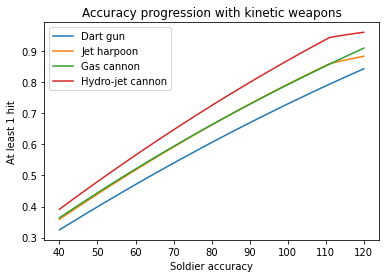

In [15]:
weapon_proficiency_development_one_kinetic = weapon_proficiency_development_one.loc[ ["dart_gun", "jet_harpoon", "gas_cannon", "hidro_jet_cannon"] ]
weapon_proficiency_development_one_kinetic = weapon_proficiency_development_one_kinetic.sort_values(by=["at_least_one"])
weapon_proficiency_development_one_kinetic = weapon_proficiency_development_one_kinetic.unstack(level=0)
ax = weapon_proficiency_development_one_kinetic.plot(title="Accuracy progression with kinetic weapons")
ax.legend(["Dart gun", "Jet harpoon", "Gas cannon", "Hydro-jet cannon"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("At least 1 hit")

## Melee

Text(0, 0.5, 'At least 1 hit')

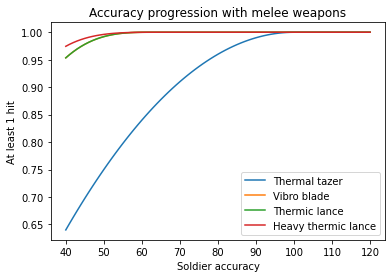

In [16]:
weapon_proficiency_development_one_melee = weapon_proficiency_development_one.loc[ ["thermal_tazer", "vibro_blade", "thermic_lance", "heavy_thermic_lance"] ]
weapon_proficiency_development_one_melee = weapon_proficiency_development_one_melee.sort_values(by=["at_least_one"])
weapon_proficiency_development_one_melee = weapon_proficiency_development_one_melee.unstack(level=0)
ax = weapon_proficiency_development_one_melee.plot(title="Accuracy progression with melee weapons")
ax.legend(["Thermal tazer", "Vibro blade", "Thermic lance", "Heavy thermic lance"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("At least 1 hit")

## Explosive

Text(0, 0.5, 'At least 1 hit')

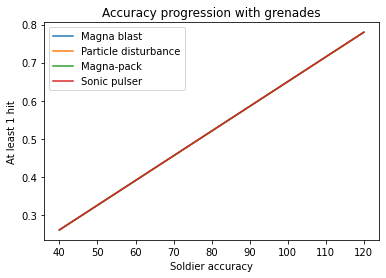

In [17]:
weapon_proficiency_development_one_grenade = weapon_proficiency_development_one.loc[ ["magna_blast_grenade", "particle_disturbance_grenade", "magna_pack_explosive", "sonic_pulser"] ]
weapon_proficiency_development_one_grenade = weapon_proficiency_development_one_grenade.sort_values(by=["at_least_one"])
weapon_proficiency_development_one_grenade = weapon_proficiency_development_one_grenade.unstack(level=0)
ax = weapon_proficiency_development_one_grenade.plot(title="Accuracy progression with grenades")
ax.legend(["Magna blast", "Particle disturbance", "Magna-pack", "Sonic pulser"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("At least 1 hit")

Text(0, 0.5, 'At least 1 hit')

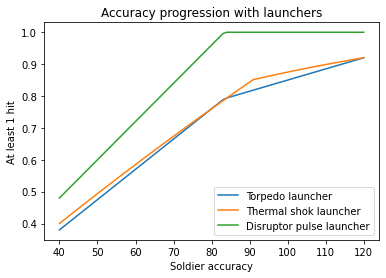

In [18]:
weapon_proficiency_development_one_launcher = weapon_proficiency_development_one.loc[ ["torpedo_launcher", "disruptor_pulse_launcher", "thermal_shok_launcher"] ]
weapon_proficiency_development_one_launcher = weapon_proficiency_development_one_launcher.sort_values(by=["at_least_one"])
weapon_proficiency_development_one_launcher = weapon_proficiency_development_one_launcher.unstack(level=0)
ax = weapon_proficiency_development_one_launcher.plot(title="Accuracy progression with launchers")
ax.legend(["Torpedo launcher", "Thermal shok launcher", "Disruptor pulse launcher"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("At least 1 hit")

## Gauss

Text(0, 0.5, 'At least 1 hit')

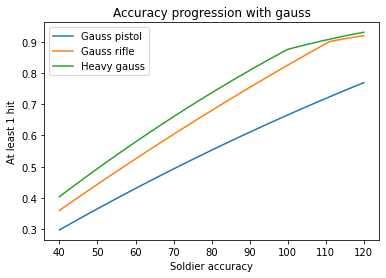

In [19]:
weapon_proficiency_development_one_laser = weapon_proficiency_development_one.loc[ ["gauss_pistol", "gauss_rifle", "heavy_gauss"] ]
weapon_proficiency_development_one_laser = weapon_proficiency_development_one_laser.sort_values(by=["at_least_one"])
weapon_proficiency_development_one_laser = weapon_proficiency_development_one_laser.unstack(level=0)
ax = weapon_proficiency_development_one_laser.plot(title="Accuracy progression with gauss")
ax.legend(["Gauss pistol", "Gauss rifle", "Heavy gauss"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("At least 1 hit")

## Sonic

Text(0, 0.5, 'At least 1 hit')

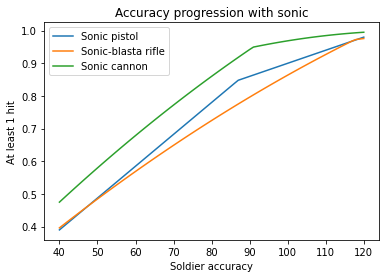

In [20]:
weapon_proficiency_development_one_plasma = weapon_proficiency_development_one.loc[ ["sonic_pistol", "sonic_blasta_rifle", "sonic_cannon"] ]
weapon_proficiency_development_one_plasma = weapon_proficiency_development_one_plasma.sort_values(by=["at_least_one"])
weapon_proficiency_development_one_plasma = weapon_proficiency_development_one_plasma.unstack(level=0)
ax = weapon_proficiency_development_one_plasma.plot(title="Accuracy progression with sonic")
ax.legend(["Sonic pistol", "Sonic-blasta rifle", "Sonic cannon"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("At least 1 hit")

## Tank

Text(0, 0.5, 'At least 1 hit')

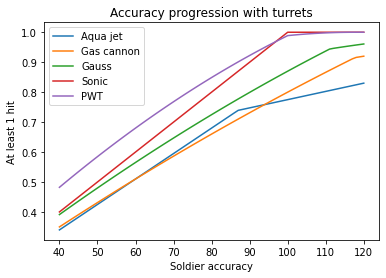

In [21]:
weapon_proficiency_development_one_turret = weapon_proficiency_development_one.loc[ ["aqua_jet_cannon_turret", "gas_cannon_turret", "gauss_cannon_turret", "sonic_cannon_turret", "pwt_cannon_turret"] ]
weapon_proficiency_development_one_turret = weapon_proficiency_development_one_turret.sort_values(by=["at_least_one"])
weapon_proficiency_development_one_turret = weapon_proficiency_development_one_turret.unstack(level=0)
ax = weapon_proficiency_development_one_turret.plot(title="Accuracy progression with turrets")
ax.legend(["Aqua jet", "Gas cannon", "Gauss", "Sonic", "PWT"])
ax.set_xlabel("Soldier accuracy")
ax.set_ylabel("At least 1 hit")

## Weapon Accuracy Comparison

Using an average soldier Accuracy of 50.

### On Average

Text(0, 0.5, 'Chance to hit')

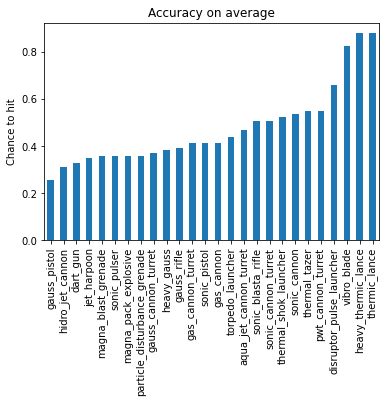

In [22]:
weapon_proficiency_development_average_middle = weapon_proficiency_development_average.xs(55, level="soldier_accuracy")
weapon_proficiency_development_average_middle = weapon_proficiency_development_average_middle.sort_values(by=["chance_to_hit"])
ax = weapon_proficiency_development_average_middle.plot.bar(title="Accuracy on average", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Chance to hit")

### At Least One

Text(0, 0.5, 'At least 1 hit')

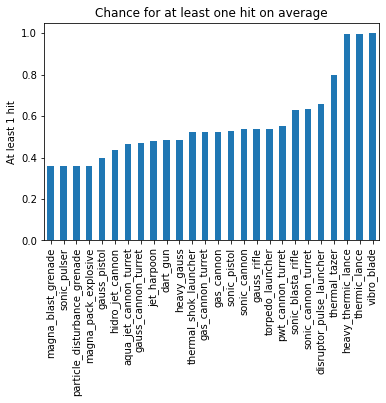

In [23]:
weapon_proficiency_development_one_middle = weapon_proficiency_development_one.xs(55, level="soldier_accuracy")
weapon_proficiency_development_one_middle = weapon_proficiency_development_one_middle.sort_values(by=["at_least_one"])
ax = weapon_proficiency_development_one_middle.plot.bar(title="Chance for at least one hit on average", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("At least 1 hit")